In [9]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [10]:
# Function to benchmark different methods
def benchmark_methods(df_sizes):
    results = {
        'iloc': [], 'iterrows': [], 'itertuples': [], 'apply': [], 'numpy': []
    }
    for size in df_sizes:
        print(f"Processing DataFrame with {size} rows...")
        df = pd.DataFrame({'A': np.random.randint(1, 100, size), 'B': np.random.randint(1, 100, size)})
        # iloc
        start = time.time()
        for i in range(len(df)):
            _ = df.iloc[i, 0] + df.iloc[i, 1]
        results['iloc'].append(time.time() - start)
        # iterrows
        start = time.time()
        for _, row in df.iterrows():
            _ = row['A'] + row['B']
        results['iterrows'].append(time.time() - start)
        # itertuples
        start = time.time()
        for row in df.itertuples(index=False):
            _ = row.A + row.B
        results['itertuples'].append(time.time() - start)
        # apply
        start = time.time()
        df['C'] = df.apply(lambda row: row['A'] + row['B'], axis=1)
        results['apply'].append(time.time() - start)
        # NumPy vectorization
        start = time.time()
        df['C'] = df['A'] + df['B']
        results['numpy'].append(time.time() - start)
    return results

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
for method, times in results.items():
    plt.plot(dataset_sizes, times, marker='o', label=method)

plt.xlabel("Number of Rows")
plt.ylabel("Time Taken (seconds)")
plt.xscale("log")  # Use logarithmic scale for better visualization
plt.yscale("log")
plt.legend()
plt.title("Performance Comparison of Pandas Methods")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [12]:
# Define dataset sizes
dataset_sizes = [1000, 10000, 100000,1000000,5000000]
results = benchmark_methods(dataset_sizes)

Processing DataFrame with 1000 rows...
Processing DataFrame with 10000 rows...
Processing DataFrame with 100000 rows...
Processing DataFrame with 1000000 rows...
Processing DataFrame with 5000000 rows...


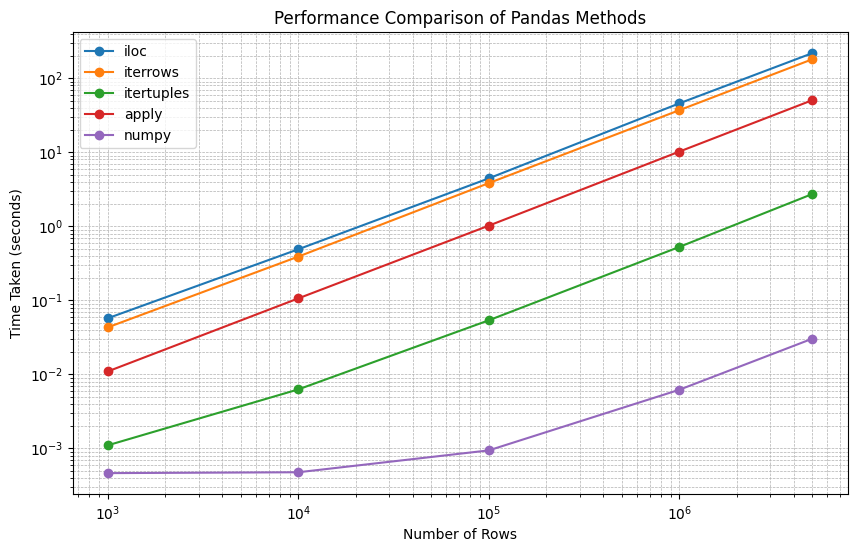

In [13]:
# Plot results
plt.figure(figsize=(10, 6))
for method, times in results.items():
    plt.plot(dataset_sizes, times, marker='o', label=method)

plt.xlabel("Number of Rows")
plt.ylabel("Time Taken (seconds)")
plt.xscale("log")  # Used logarithmic scale for better visualization
plt.yscale("log")
plt.legend()
plt.title("Performance Comparison of Pandas Methods")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()